## Regression Comparison: Ridge vs. Robust 
Examine the effect of outliers on OLS ridge and robust huber regression. 

### Sources
1.  code: https://scikit-learn.org/stable/auto_examples/linear_model/plot_huber_vs_ridge.html#sphx-glr-auto-examples-linear-model-plot-huber-vs-ridge-py
2.  ridge regesssion: https://youtu.be/Q81RR3yKn30
3.  huber regression: https://youtu.be/7a_6roLjwaA

In [1]:
# import tools
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.linear_model import HuberRegressor, Ridge

In [2]:
# generate toy data.
rng = np.random.RandomState(0)
X, y = make_regression(n_samples=20, n_features=1, random_state=1, noise=5.0, bias=100.0)

In [3]:
# make 4 random outliers from probability density.
# center mean for X and y around 0. as the predicted variable, give y a greater variance.
# to satisfy matrix algebra requirement for regression: X is a (4,1) vector and y is a (4,) scalar 
X_outliers = rng.normal(0, 0.5, size=(4, 1))
y_outliers = rng.normal(0, 2.0, size=4)

In [4]:
# insert random outliers into extreme corners of toy data.
# large X, small y for first two random numbers.
X_outliers[:2, :] += X.max() + X.mean() / 4.
y_outliers[:2] += y.min() - y.mean() / 4.

# small X, large y for last two random numbers.
X_outliers[2:, :] += X.min() - X.mean() / 4.
y_outliers[2:] += y.max() + y.mean() / 4.

# append outliers to X and y
X = np.vstack((X, X_outliers))
y = np.concatenate((y, y_outliers))

In [5]:
# fit the huber regressor to toy data with standard epsilon=1.35.
huber = HuberRegressor(fit_intercept=True, alpha=0.0, max_iter=100, epsilon=1.35)
huber.fit(X, y)

HuberRegressor(alpha=0.0, epsilon=1.35, fit_intercept=True, max_iter=100,
        tol=1e-05, warm_start=False)

In [6]:
# fit a ridge regressor to toy data with alpha=0.
ridge = Ridge(fit_intercept=True, alpha=0.0, random_state=0, normalize=True)
ridge.fit(X, y)

Ridge(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=0, solver='auto', tol=0.001)

In [7]:
# make a regression line with huber and ridge coefficients: y = mx+b
# With only a single predictor X is 1D and linear. Regression produces a single coefficient. 
x = np.linspace(X.min(), X.max(), 5)
coef_huber = huber.coef_ * x + huber.intercept_
print(huber.coef_)

coef_ridge = ridge.coef_ * x + ridge.intercept_
print(ridge.coef_)

[67.14394107]
[11.57712283]


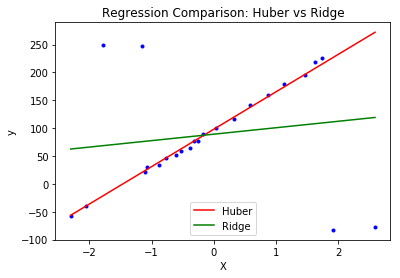

In [34]:
# construct plot that brings data, random outliers, and regression lines together
plt.plot(X, y, 'b.')
plt.plot(x, coef_huber, "r-", label="Huber")
plt.plot(x, coef_ridge, 'g-', label="Ridge")
plt.title("Regression Comparison: Huber vs Ridge")
plt.xlabel("X")
plt.ylabel("y")
plt.legend(loc=0)
plt.show()

### Note:
For simplicity alpha and epsilon for the ridge and huber regressors where set at default values. Both parameters attempt to minimize the impact/weight of residuals on the predicted model. Alpha  minimimzes coefficients by multiplying a penalty (alpha>0) to the weighting term in the OLS approach. Epsilon takes the abosulte value, instead of the square, of residuals for extreme cases. How aggressively epsilon classfies outliers is determined by its given value. 

### Conclusion:
While the ridge estimator attempts to minimize the impact of extreme values with alpha, it cannot handle outliers that deviate drastically from the mean of the residual error. This is illustrated by the poorly "fit" ridge line in the figure above. However, the huber estimator can counter act the weight of outliers on the regression by taking the absolute value of their residual errors. The minimzed weight of the outliers on the huber estimator is illustrated by the well "fit" huber line in the figure above. Due to the huber estimators ability to detect and minimuze radical residual errors it is classified as a robust regressor.  